In [1]:

import os
import json

# Load Kaggle credentials from JSON file
kaggle_credentials = json.load(open('/content/kaggle (6).json'))

# Set environment variables for Kaggle API
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]


In [2]:

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

from zipfile import ZipFile

with ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [3]:

import tensorflow as tf

train_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

val_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

train_set = train_set.prefetch(buffer_size=tf.data.AUTOTUNE)
val_set = val_set.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [4]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,996,838 (57.21 MB)

 Trainable params: 282,150 (1.08 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:

history = model.fit(train_set, validation_data=val_set, epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 501s 222ms/step - accuracy: 0.4125 - loss: 3.1085 - val_accuracy: 0.8961 - val_loss: 0.3685
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 485s 220ms/step - accuracy: 0.8276 - loss: 0.5542 - val_accuracy: 0.9330 - val_loss: 0.2281
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 502s 220ms/step - accuracy: 0.8842 - loss: 0.3632 - val_accuracy: 0.9441 - val_loss: 0.1806
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 445s 194ms/step - accuracy: 0.9108 - loss: 0.2729 - val_accuracy: 0.9516 - val_loss: 0.1492
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 498s 219ms/step - accuracy: 0.9254 - loss: 0.2235 - val_accuracy: 0.9569 - val_loss: 0.1326
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 446s 194ms/step - accuracy: 0.9379 - loss: 0.1879 - val_accuracy: 0.9619 - val_loss: 0.1172
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 499s 220ms/step - accuracy: 0.9454 - loss: 0.1632 - val_accuracy: 0.9653 - val_loss: 0.1066
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 446s 194ms/step - ac

In [6]:

train_loss, train_acc = model.evaluate(train_set)
val_loss, val_acc = model.evaluate(val_set)

print(f"Training Accuracy: {train_acc}, Loss: {train_loss}")
print(f"Validation Accuracy: {val_acc}, Loss: {val_loss}")

model.save("vgg16_plant_disease_model.h5")

import json
with open("vgg16_training_history.json", "w") as f:
    json.dump(history.history, f)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 346s 157ms/step - accuracy: 0.9854 - loss: 0.0522
550/550 ━━━━━━━━━━━━━━━━━━━━ 87s 157ms/step - accuracy: 0.9672 - loss: 0.0962


Training Accuracy: 0.9865139722824097, Loss: 0.049173615872859955
Validation Accuracy: 0.9684725403785706, Loss: 0.09331902861595154


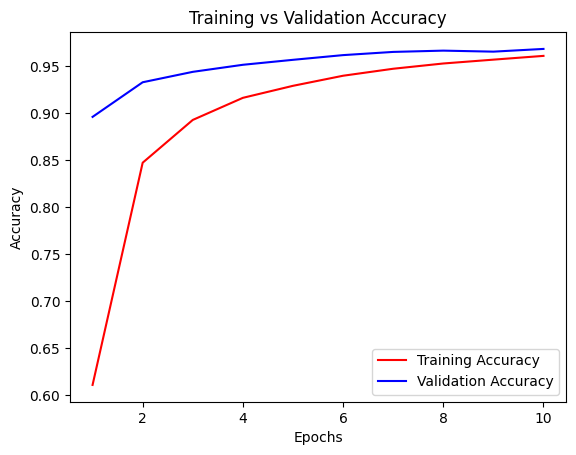

In [7]:

import matplotlib.pyplot as plt

epochs = range(1, 11)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.savefig("training_vs_validation_accuracy_graph.png")
plt.show()


Found 17572 files belonging to 38 classes.
550/550 ━━━━━━━━━━━━━━━━━━━━ 88s 158ms/step


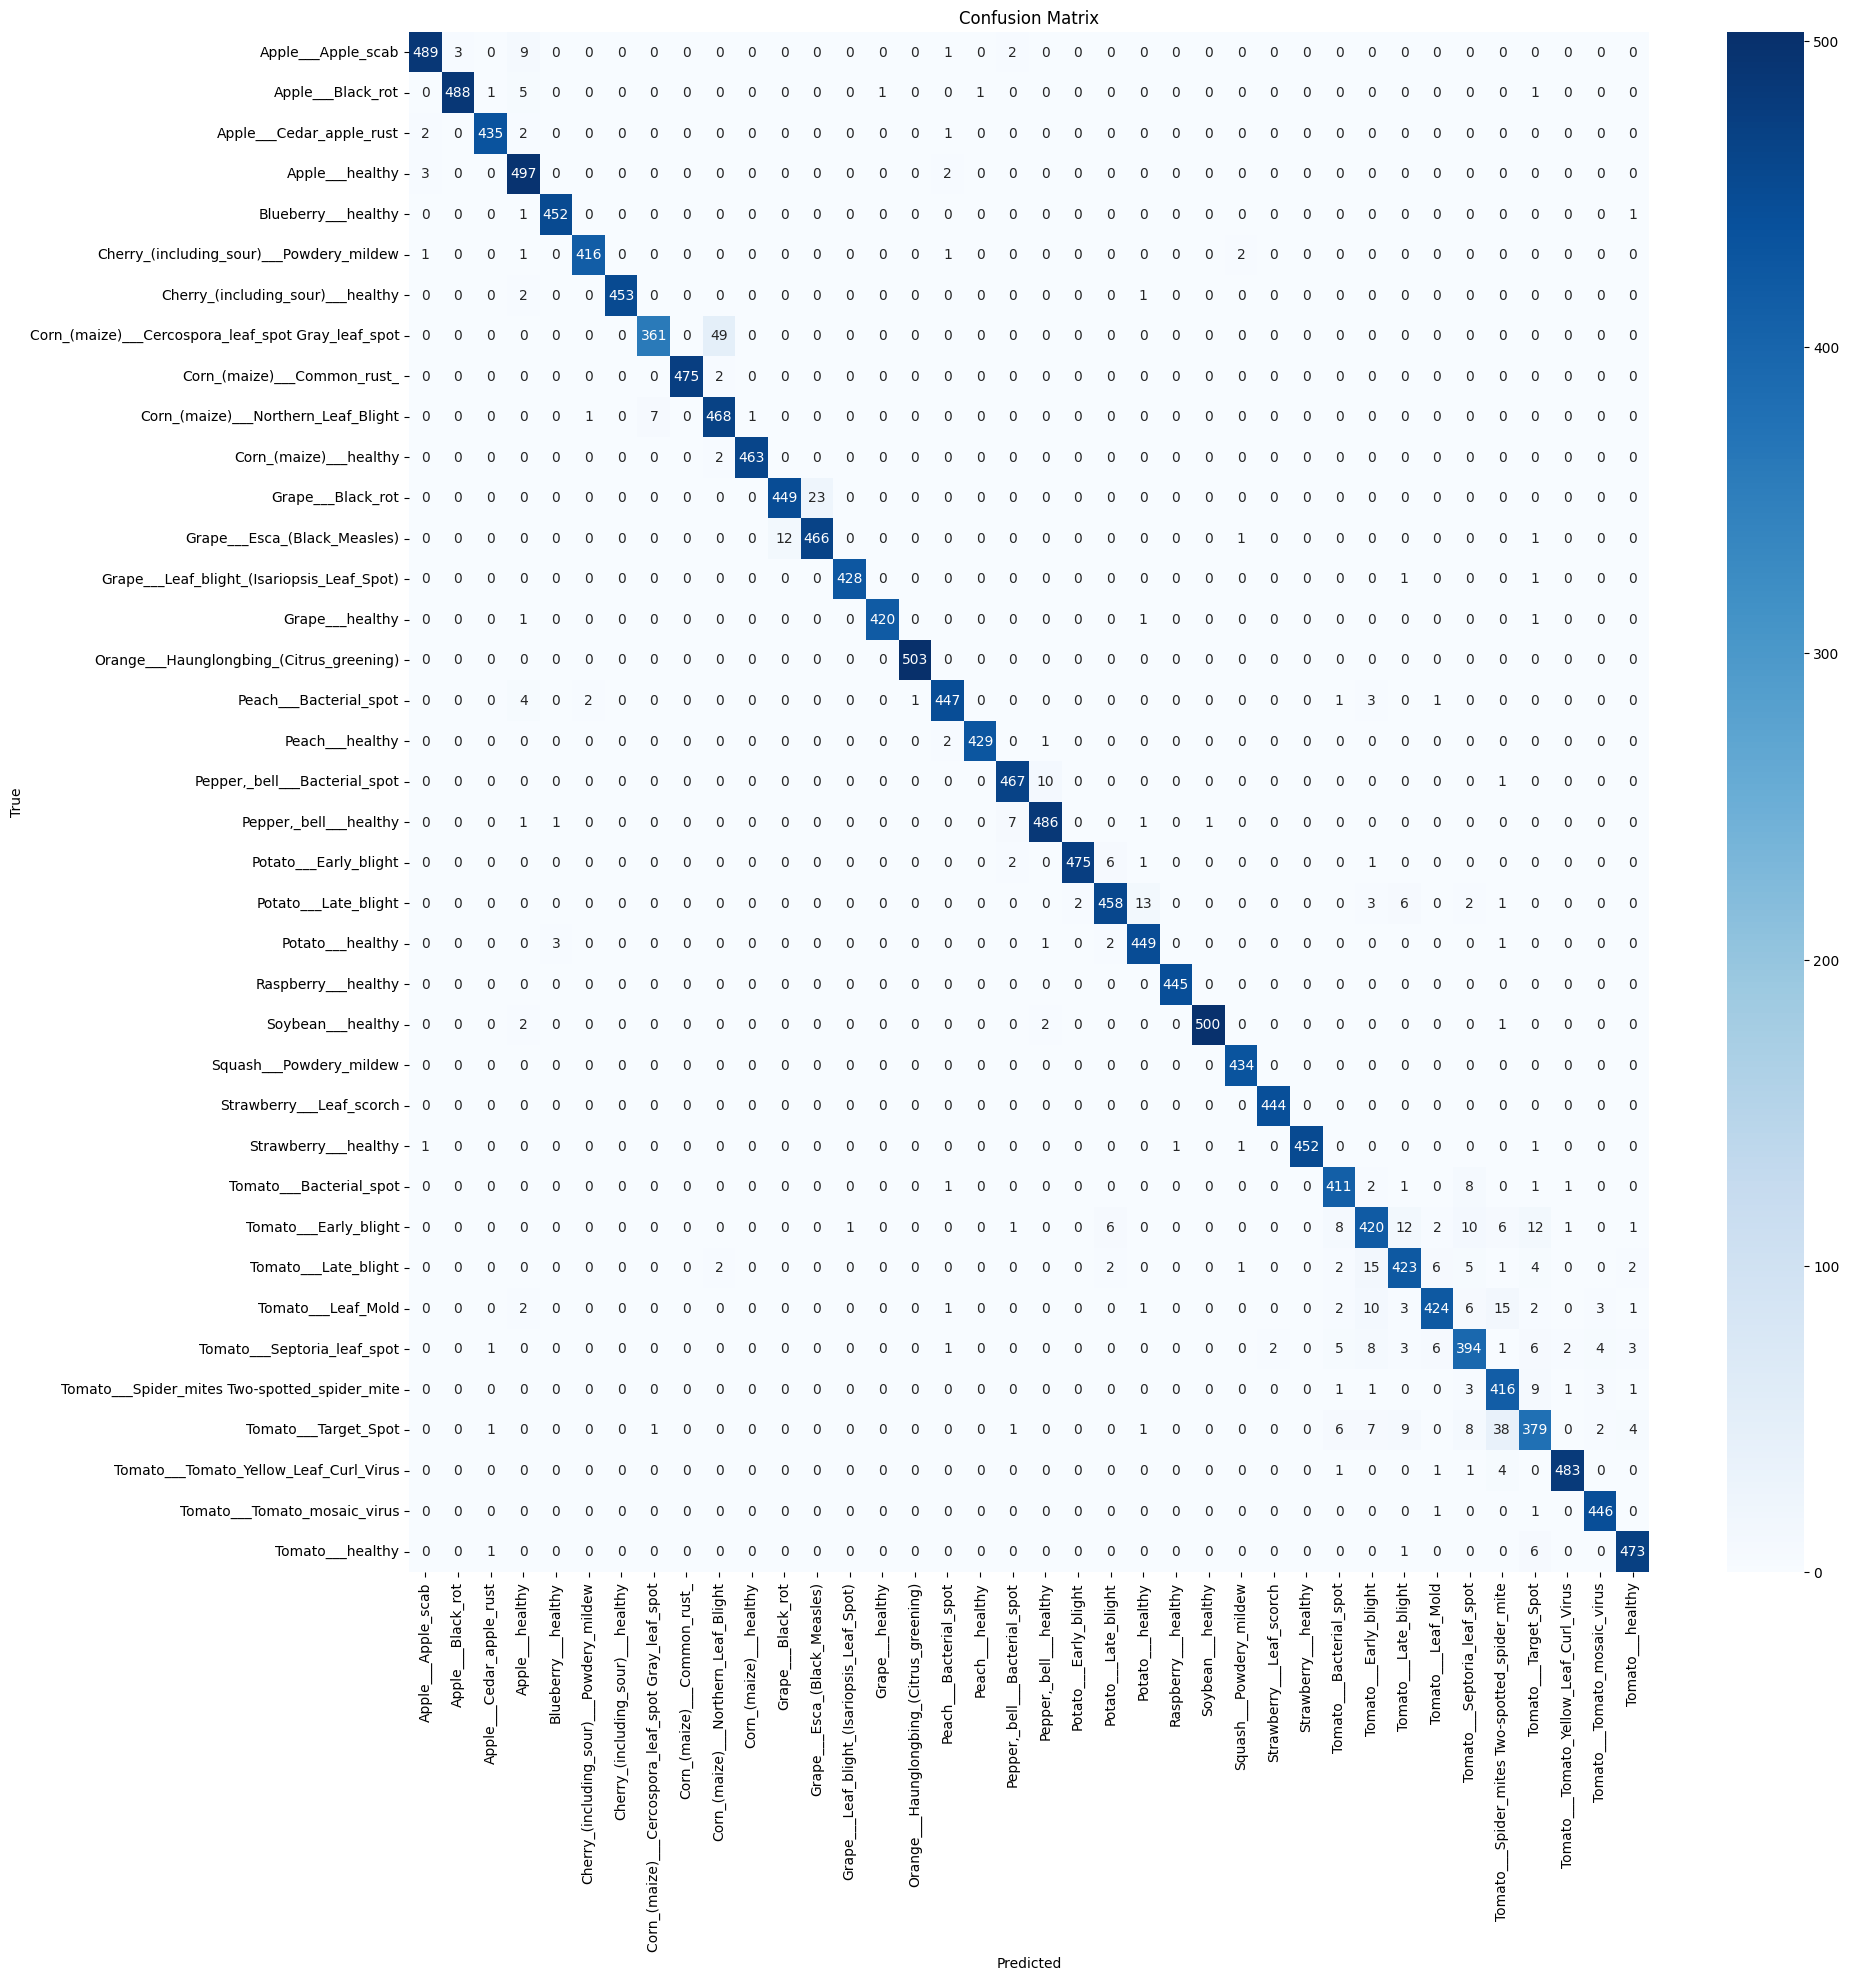

In [8]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load test set
test_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

# Get class names
class_name = test_set.class_names

# Predict
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

In [9]:
# Classification Report
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.94      0.99      0.97       502
                               Blueberry___healthy       0.99      1.00      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.88      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.98      0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


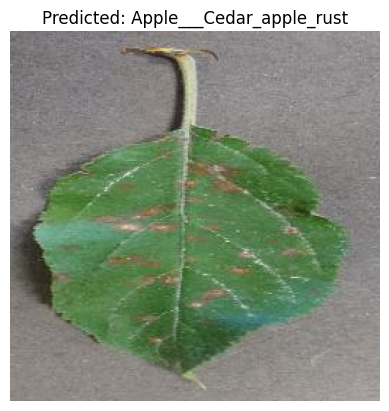

In [10]:

from tensorflow.keras.preprocessing import image
import cv2

img_path = "/content/test/test/AppleCedarRust2.JPG"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
result_index = np.argmax(pred)
class_names = test_set.class_names
prediction_name = class_names[result_index]

img_cv = cv2.imread(img_path)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv)
plt.title(f"Predicted: {prediction_name}")
plt.axis('off')
plt.savefig("sampleprediction.png")
plt.show()
